A: - cluster outputs into three groups
    - Get the means of these three groups 

B: Plot decision function with random forests

C: Classification with nearest neighbor

D: Answer two questions


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Part A: K-means clustering

Steps:
- Load data
- Plot data
- Train k means clustering
- Plot output
- Get means
- Iterate for better results

In [2]:
df = pd.read_csv("data/volts.csv")

X = np.array(df[['x1','x2']])
y = df[['y1','y2']]

X1 = df['x1']
X2 = df['x2']

y1 = df['y1']
y2 = df['y2']

(-1.0, 11.0)

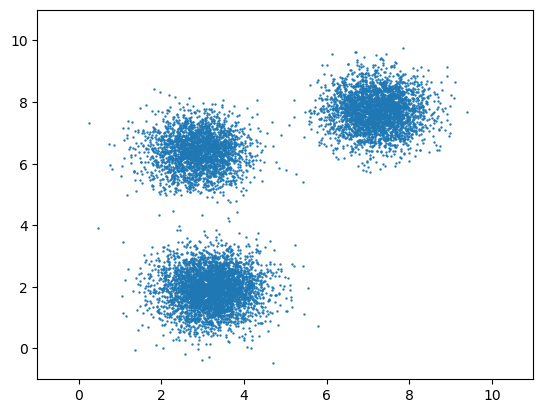

In [3]:
fig,ax = plt.subplots()
ax.scatter(y1,y2,s=0.5)
ax.set_ylim(-1,11)
ax.set_xlim(-1,11)

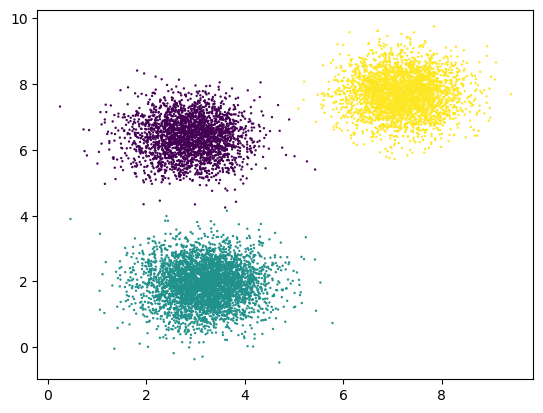

In [4]:
from sklearn.cluster import KMeans

init = np.array([[3,2],[3,6],[7,8]])
max_iter = 300
km = KMeans(n_clusters=3, max_iter=max_iter)

y_pred = km.fit_predict(y)

plt.scatter(y1,y2,c=y_pred,s=0.5)

In [5]:
km.cluster_centers_

array([[2.88507126, 6.39672699],
       [3.19462558, 1.91429061],
       [7.19831173, 7.70619219]])

In [6]:
km_centers = km.cluster_centers_

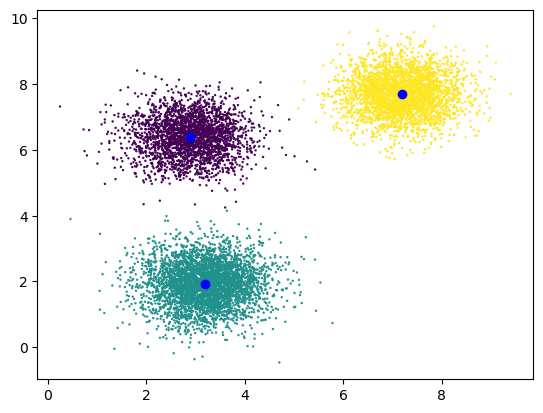

In [7]:
fig,ax = plt.subplots()
ax.scatter(y1,y2,s=0.5,c=y_pred)
ax.scatter(km_centers[:,0], km_centers[:,1], c='b')

### Extra - Use dbscan to remove outliers 

In [8]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.3)

y_pred_dbs = dbs.fit_predict(y)

dbs.components_

array([[6.85998537, 7.51385197],
       [2.08787739, 6.65728753],
       [3.11536868, 6.09980009],
       ...,
       [3.16722864, 2.71123112],
       [6.51148467, 8.22991627],
       [2.49058066, 2.52496488]])

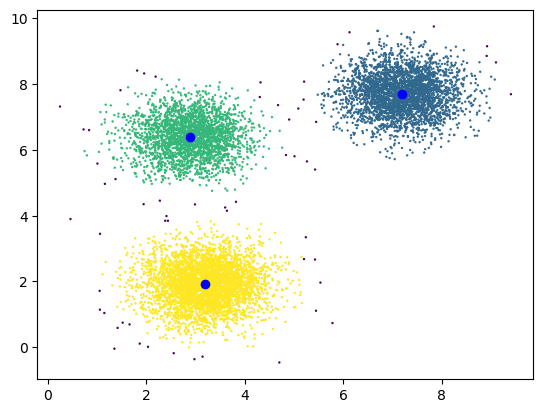

In [9]:
fig,ax = plt.subplots()
ax.scatter(y1,y2,s=0.5,c=y_pred_dbs)
ax.scatter(km_centers[:,0], km_centers[:,1], c='b')

In [10]:
notnoise = y_pred_dbs > -1 # outliers have label of -1
y1 = y1[notnoise]
y2 = y2[notnoise]
y = y[notnoise]
X = X[notnoise]
X1 = X1[notnoise]
X2 = X2[notnoise]

- Run kmeans again

In [11]:
init = np.array([[3,2],[3,6],[7,8]])
max_iter = 300

km = KMeans(n_clusters=3, max_iter=max_iter)

y_pred = km.fit_predict(y)

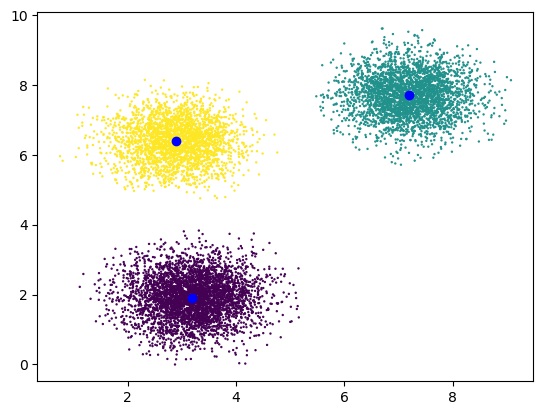

In [12]:
fig,ax = plt.subplots()
ax.scatter(y1,y2,s=0.5,c=y_pred)
ax.scatter(km_centers[:,0], km_centers[:,1], c='b')

In [13]:
km.cluster_centers_

array([[3.19664051, 1.91610362],
       [7.19895606, 7.70373389],
       [2.88511741, 6.3981126 ]])

## Part B: Train classifier to predict y

Generate grid

In [14]:
def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(0, limit, npx)
  x2line = np.linspace(0, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

In [15]:
y = y_pred
n=100
Xgrid,x1line,x2line = gen_sample_grid(n,n,10)

Train random forest

In [16]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(n_estimators=100, max_depth=20)
rf.fit(X,y)

prob = rf.predict_proba(Xgrid)
prob_plot = prob[:,0].reshape(n,n)
prob_plot.shape

(100, 100)

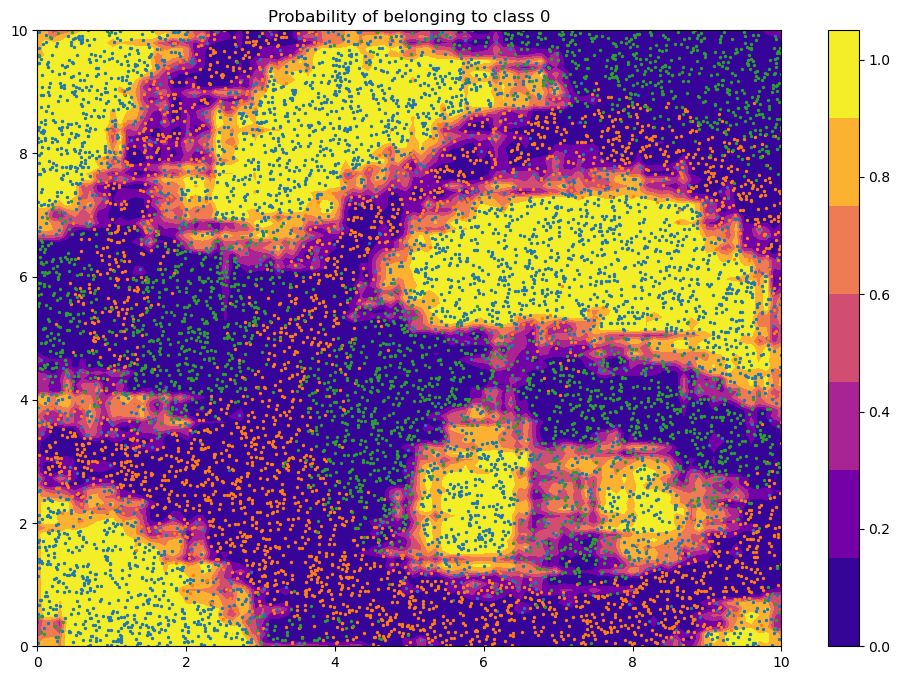

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8, forward=True)
contour = ax.contourf(x1line,x2line,prob_plot,vmax=1.0,cmap="plasma")
fig.colorbar(contour,ticks=[0,0.2,0.4,0.6,0.8,1.0])

plt.title('Probability of belonging to class 0')

ax.scatter(X[y == 0, 0], X[y == 0, 1],s=2)
ax.scatter(X[y == 1, 0], X[y == 1, 1],s=2)
ax.scatter(X[y == 2, 0], X[y == 2, 1],s=2)
plt.show()

## Part C

- Use nearest neighbors approach to classify 

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0.5, 1.0, 'Prediction with n =1 neighbors')

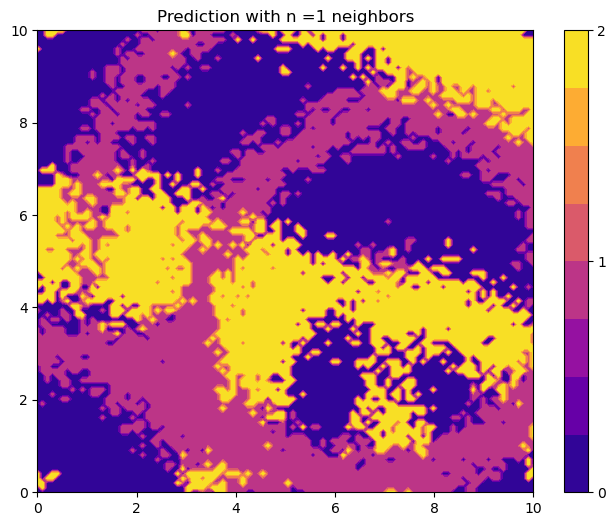

In [18]:
from sklearn.neighbors import KNeighborsClassifier

near = 1

neigh = KNeighborsClassifier(n_neighbors=near)
neigh.fit(X,y)

y_pred = neigh.predict(Xgrid)
y_pred = np.reshape(y_pred,(n,n))

fig, ax = plt.subplots()
fig.set_size_inches(8, 6, forward=True)

contour = ax.contourf(x1line,x2line,y_pred,cmap='plasma')

fig.colorbar(contour,ticks=[0,1,2])
plt.title('Prediction with n ={} neighbors'.format(near))


Part D

1. K-means perform best for classifying output states. Other methods's contour plots look too complicated and overfitting.

2. I could perform regression and train it to predict y with x. We can do this when the output is in classes as well. 

Plot the original data so you understand which class is which

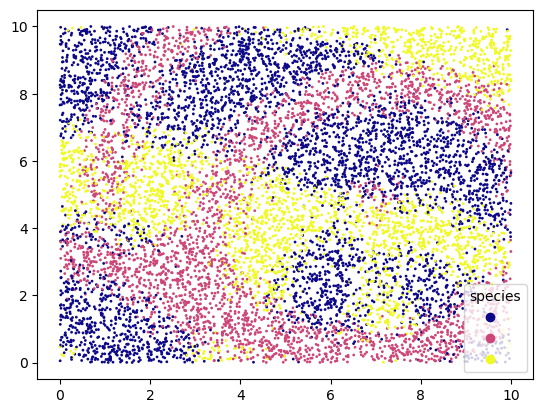

In [19]:

scatter = plt.scatter(X1, X2, c=y, s = 1,cmap='plasma')

plt.legend(handles=scatter.legend_elements()[0], 
           title="species")